In [1]:
import sys

sys.path.insert(1, "/home/vinicius/storage1/projects/IPP_WANG")

In [32]:
import numpy as np
import xarray as xr
from src.infodyn.conn_pid import conn_pid
from frites.conn import conn_te
import matplotlib.pyplot as plt

In [3]:
rates = xr.load_dataarray("../data/protocol0.nc")

#### Firing rate average over trials

In [5]:
rates_avg = rates.mean("trials")

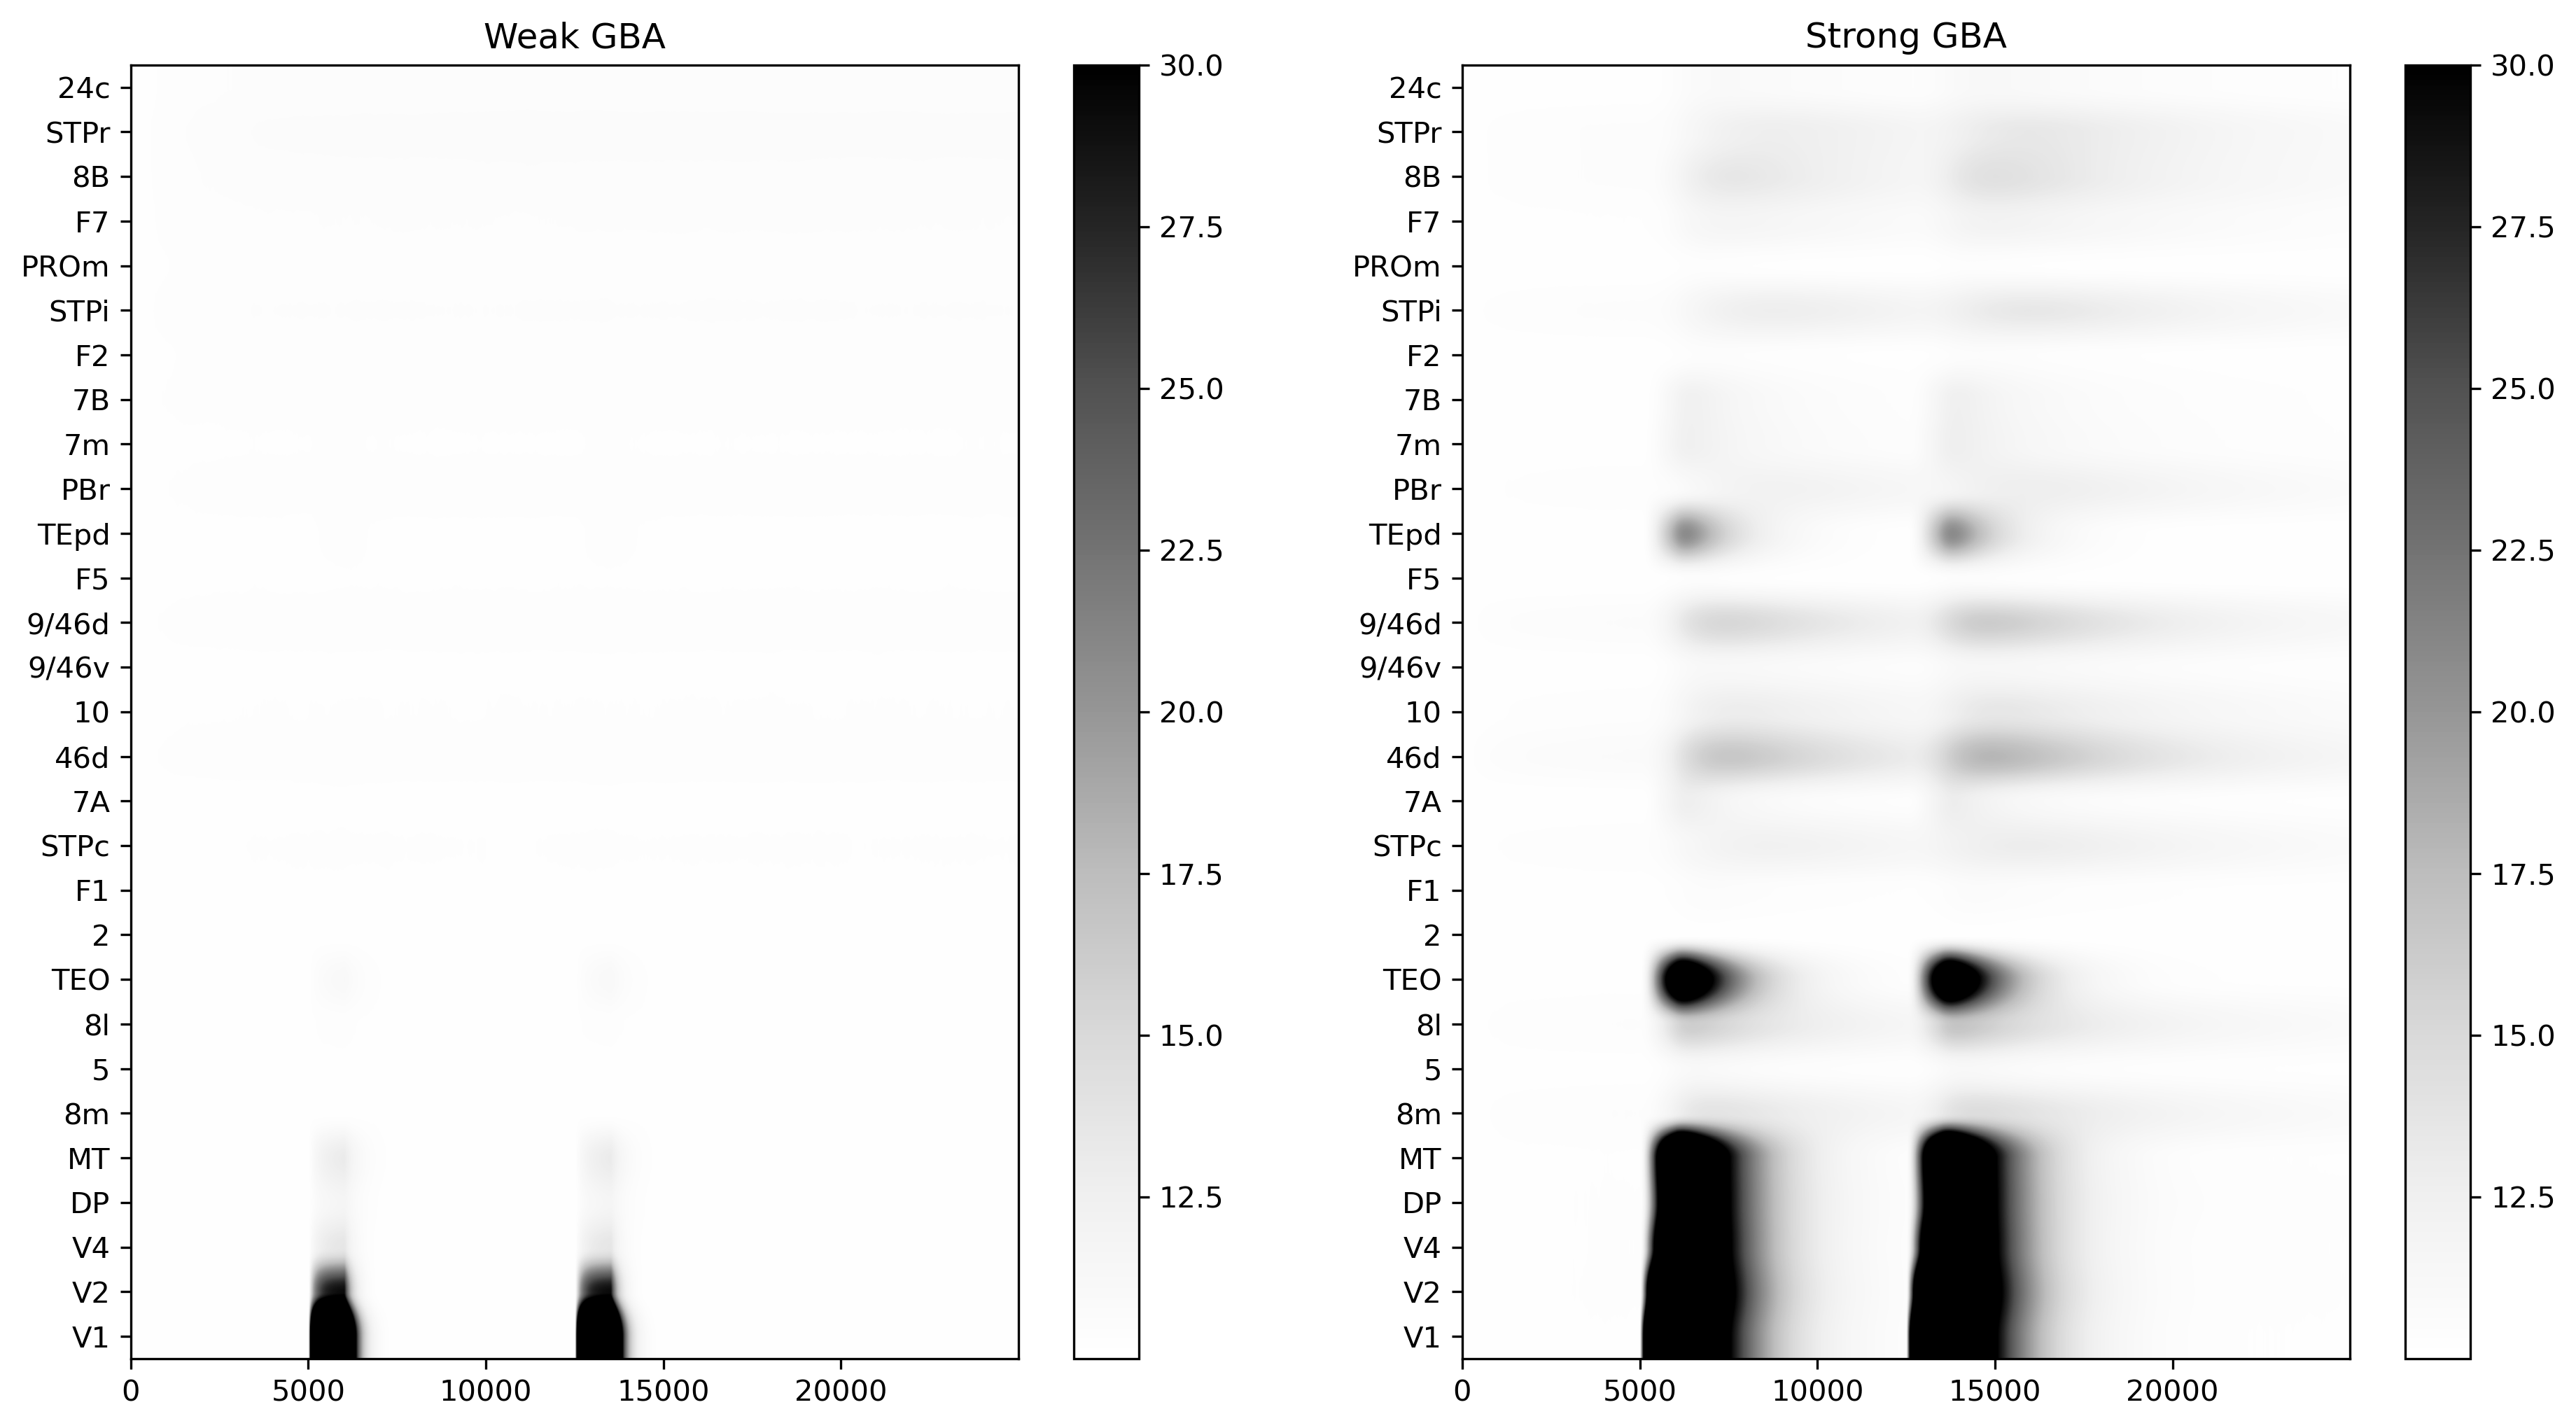

In [28]:
plt.figure(figsize=(15, 8), dpi=300)
plt.subplot(1, 2, 1)
plt.imshow(rates_avg.sel(gba="weak"), aspect="auto", origin="lower", cmap="Greys", vmax=30)
plt.yticks(range(rates_avg.sizes["roi"]), rates_avg.roi.data)
plt.title("Weak GBA")
plt.colorbar()
plt.subplot(1, 2, 2)
plt.imshow(rates_avg.sel(gba="strong"), aspect="auto", origin="lower", cmap="Greys", vmax=30)
plt.yticks(range(rates_avg.sizes["roi"]), rates_avg.roi.data);
plt.title("Strong GBA")
plt.colorbar()

In [34]:
conn_pid?

Signature:
conn_pid(
    data,
    y,
    roi=None,
    times=None,
    mi_type='cc',
    gcrn=True,
    dt=1,
    sfreq=None,
    verbose=None,
    **kw_links,
)
Docstring:
Compute the Partial Information Decomposition on connectivity pairs.
This function can be used to untangle how the information about a stimulus
is carried inside a brain network.
Parameters
----------
data : array_like
    Electrophysiological data. Several input types are supported :
        * Standard NumPy arrays of shape (n_epochs, n_roi, n_times)
        * mne.Epochs
        * xarray.DataArray of shape (n_epochs, n_roi, n_times)
y : array_like
    The feature of shape (n_trials,). This feature vector can either be
    categorical and in that case, the mutual information type has to 'cd'
    or y can also be a continuous regressor and in that case the mutual
    information type has to be 'cc'
roi : array_like | None
    Array of region of interest name of shape (n_roi,)
times : array_like | None
    Array of t